# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

### 데이터 셋 읽어오기

In [2]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
customer_type_index = df_train[df_train['customer_type'].isnull()].index
customer_job_index = df_train[df_train['customer_job'].isnull()].index
test_customer_type_index = df_test[df_test['customer_type'].isnull()].index
test_customer_job_index = df_test[df_test['customer_job'].isnull()].index
business_sub_index = df_train[df_train['business_subarea'].isnull()].index
test_business_sub_index = df_test[df_test['business_subarea'].isnull()].index

In [4]:
business_index = df_train[df_train['business_area'].isnull()].index
test_business_index = df_test[df_test['business_area'].isnull()].index

### 1. historical_existing_cnt

In [5]:
# df_train['historical_existing_cnt'].fillna(df_train.groupby('is_converted')['historical_existing_cnt'].transform(lambda x: x.mode()[0]),inplace=True)
# df_test['historical_existing_cnt'].fillna(df_test.groupby('is_converted')['historical_existing_cnt'].transform(lambda x: x.mode()[0]),inplace=True)

In [6]:
# df_train['ver_win_rate_x'].fillna(df_train.groupby('is_converted')['ver_win_rate_x'].transform(lambda x: x.mode()[0]),inplace=True)
# df_test['ver_win_rate_x'].fillna(df_test.groupby('is_converted')['ver_win_rate_x'].transform(lambda x: x.mode()[0]),inplace=True)

In [7]:
def Q_index(col):
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_outlier = Q1 - 1.5 * IQR
    upper_outlier = Q3 + 1.5 * IQR
    print(lower_outlier, upper_outlier)
    outlier = df_train[(df_train[col] < lower_outlier) | (df_train[col] > upper_outlier)].index
    test_outlier = df_test[(df_test[col] < lower_outlier) | (df_test[col] > upper_outlier)].index
    return outlier, test_outlier

(0.0, 50.0)

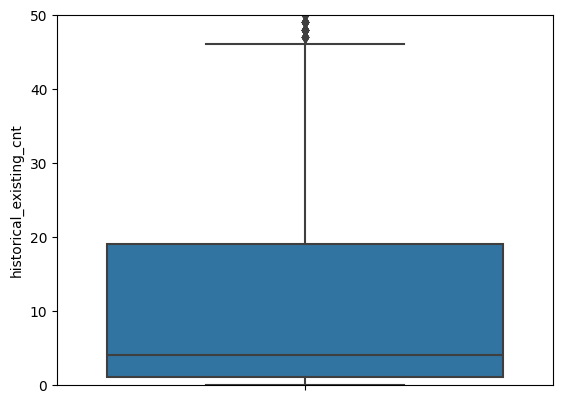

In [8]:
sns.boxplot(y=df_train['historical_existing_cnt'])
plt.ylim(0,50)

In [9]:
print(df_train['historical_existing_cnt'].median())
print(df_test['historical_existing_cnt'].median())

4.0
4.0


In [10]:
outlier, test_outlier = Q_index('historical_existing_cnt')

df_train['historical_existing_cnt'][outlier] = df_train['historical_existing_cnt'].median()
df_test['historical_existing_cnt'][test_outlier] = df_test['historical_existing_cnt'].median()

-26.0 46.0


<Axes: xlabel='historical_existing_cnt'>

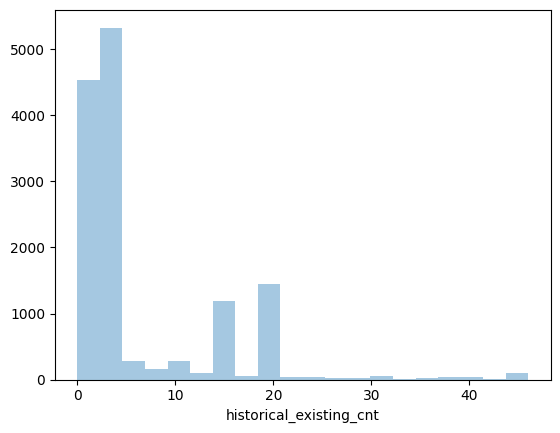

In [11]:
sns.distplot(df_train['historical_existing_cnt'], kde = False, bins = 20)

<Axes: ylabel='historical_existing_cnt'>

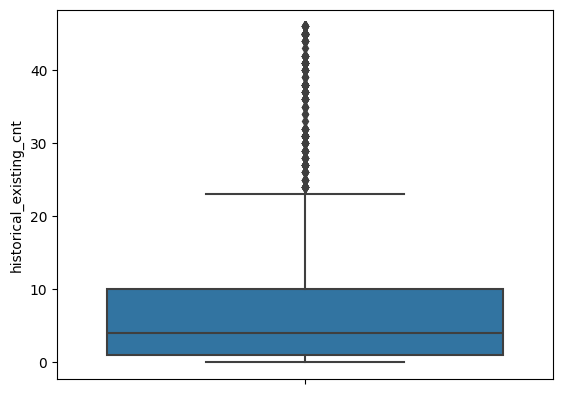

In [12]:
sns.boxplot(y=df_train['historical_existing_cnt'])

In [13]:
print(df_train['historical_existing_cnt'].describe())
print(df_test['historical_existing_cnt'].describe())
print(df_train['historical_existing_cnt'].value_counts())
print(df_test['historical_existing_cnt'].value_counts())

count    13756.000000
mean         6.650552
std          7.956247
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max         46.000000
Name: historical_existing_cnt, dtype: float64
count    1275.000000
mean        7.279216
std         8.600801
min         0.000000
25%         0.000000
50%         4.000000
75%        16.000000
max        45.000000
Name: historical_existing_cnt, dtype: float64
historical_existing_cnt
4.0     4633
0.0     1973
1.0     1967
19.0    1441
16.0    1132
3.0      695
2.0      594
11.0     217
6.0      141
5.0      138
45.0      82
7.0       69
10.0      60
9.0       51
13.0      49
12.0      48
8.0       43
17.0      42
15.0      34
31.0      31
14.0      30
38.0      25
41.0      22
22.0      20
21.0      19
23.0      19
27.0      16
24.0      14
36.0      13
37.0      13
40.0      13
42.0      11
29.0      11
30.0      11
18.0      10
32.0      10
46.0       9
20.0       9
28.0       8
44.0       8
26.0       8
25.0   

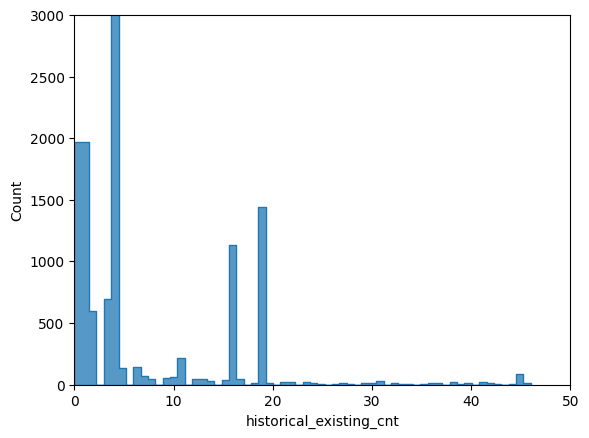

In [14]:
sns.histplot(x='historical_existing_cnt', data=df_train, element='step')
plt.xlim(0,50)
plt.ylim(0,3000)
plt.show()

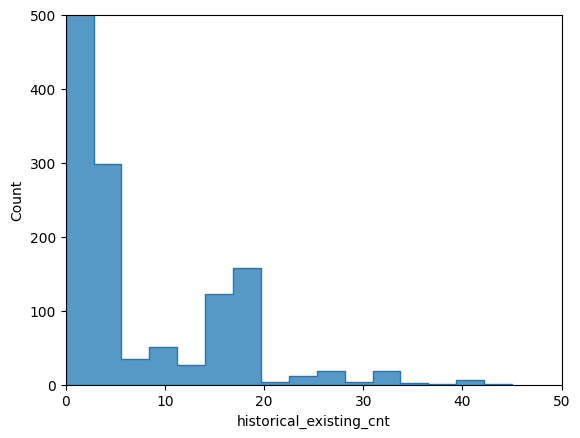

In [15]:
sns.histplot(x='historical_existing_cnt', data=df_test, element='step')
plt.xlim(0,50)
plt.ylim(0,500)
plt.show()

### 2. id_strategic_ver    it_strategic_ver  idit_strategic_ver

In [16]:
df_train['id_strategic_ver'] = df_train['business_unit'].apply(lambda x : 1 if x == 'ID' else 0)
df_test['id_strategic_ver'] = df_test['business_unit'].apply(lambda x : 1 if x == 'ID' else 0)

In [17]:
df_train['it_strategic_ver'] = df_train['business_unit'].apply(lambda x : 1 if x == 'IT' else 0)
df_test['it_strategic_ver'] = df_test['business_unit'].apply(lambda x : 1 if x == 'IT' else 0)

In [18]:
index = df_train[(df_train['id_strategic_ver'] == 1) | (df_train['it_strategic_ver'] == 1)].index
index_1 = df_test[(df_test['id_strategic_ver'] == 1) | (df_test['it_strategic_ver'] == 1)].index

In [19]:
df_train['idit_strategic_ver'][index] = 1
df_train['idit_strategic_ver'].fillna(0, inplace = True)

In [20]:
df_test['idit_strategic_ver'][index_1] = 1
df_test['idit_strategic_ver'].fillna(0, inplace = True)

## 2. 데이터 전처리

#### customer_country와 customer_country.1은 똑같아서 지움

In [21]:
df_train.drop('customer_country.1',axis = 1, inplace = True)
df_test.drop('customer_country.1',axis = 1, inplace = True)


- customer_country.1 이랑 완전히 똑같아서 버림
- split_char : / , // , 제거후 동일한 컬럼으로 합치기

In [22]:
def split_char(series : pd.Series) ->pd.Series:
    series = series.str.split('//').str[-1]
    series = series.str.split('/').str[-1]
    series = series.str.strip()
    return series

#### label_lower 함수
- 대소문자 합치기

In [23]:
import re

In [24]:
def label_lower(doc: str) -> str:
    if isinstance(doc, str):
        doc = re.sub(r'[^ A-Za-z]', '', doc)
    else :
        return doc
    return doc.lower()

In [25]:
def label_lower_series(series: pd.Series) -> pd.Series:
    return series.apply(label_lower)

### 3. customer_country 나라로만 묶어주기

In [26]:
df_train['customer_country'] = split_char(df_train['customer_country'])

In [27]:
df_train['customer_country'].fillna('', inplace = True)
us_index = df_train[df_train['customer_country'].str.contains('United States')].index
df_train['customer_country'][us_index] = 'United States'

us_index = df_train[df_train['customer_country'].str.contains('US')].index
df_train['customer_country'][us_index] = 'United States'

us_index = df_train[df_train['customer_country'].str.contains('USA')].index
df_train['customer_country'][us_index] = 'United States'

In [28]:
df_test['customer_country'] = split_char(df_test['customer_country'])

#### 
- remove_counts는 value_counts()의 개수가 3개 미만인 데이터는 nan으로 바꿔준다.

In [29]:
def remove_counts(series: pd.Series) ->pd.Series:
    if isinstance(series, object):
        value_counts = series.value_counts()
        less_than_2 = value_counts[value_counts < 3].index
        series.loc[series.isin(less_than_2)] = np.nan
    return series

In [30]:
df_train['customer_country'] = remove_counts(df_train['customer_country'])

### 4. customer_type

In [31]:
df_train['customer_type'] = label_lower_series(df_train['customer_type'])

In [32]:
df_train['customer_type'].replace('other', 'others', inplace = True)

In [33]:
df_train['customer_type'] = df_train['customer_type'].str.replace(" ", "")

In [34]:
df_test['customer_type'] = label_lower_series(df_test['customer_type'])

In [35]:
df_test['customer_type'] = df_test['customer_type'].str.replace(' ','')

### 5. customer_job
- 이건 버리는게 나을듯

### 6. product_category

In [36]:
def contain_index(contain_str, series:pd.Series):
    index = []
    if isinstance(series, object):
        index = series[series.str.contains(contain_str)].index
    return index

In [37]:
df_train['product_category'].value_counts()

product_category
interactive digital board                                                                               6154
vrf                                                                                                     5640
multi-split                                                                                             3674
video wall signage                                                                                      2029
etc.                                                                                                    2018
led signage                                                                                             1895
interactive signage                                                                                     1862
single-split                                                                                            1569
rac                                                                                                     1447
ol

In [38]:
monitor_index = contain_index('monitor', df_train[df_train['product_category'].notnull()]['product_category'])

df_train['product_category'][monitor_index] = 'monitor'

In [39]:
signage_index = contain_index('signage', df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][signage_index] = 'signage'

In [40]:
df_train['product_category'].replace('commercial display', 'tv', inplace = True)

tv_index = contain_index('tv', df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][tv_index] = 'tv'

In [41]:
#신규추가
tv_index = contain_index('ur640', df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][tv_index] = 'tv'

In [42]:
vrf_index = contain_index('vrf',df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][vrf_index] = 'vrf'

In [43]:
multi_split_index = contain_index('multi',df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][multi_split_index] = 'multi-split'

In [44]:
#신규추가
single_split_index = contain_index('single',df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][single_split_index] = 'single-split'

In [45]:
medical_index = contain_index('medical', df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][medical_index] = 'medical display'

In [46]:
#신규추가
df_train['product_category'].replace('other', 'others', inplace = True)
df_train['product_category'].replace('etc.', 'others', inplace = True)

In [47]:
#신규추가
quick_index = contain_index('quick', df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][quick_index] = 'one:quick series'

In [48]:
#신규추가
solar_index = contain_index('solar', df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][solar_index] = 'solar'a

In [49]:
#신규추가
video_index = contain_index('video', df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][video_index] = 'video wall'

In [50]:
#신규추가
ac_index = contain_index('air', df_train[df_train['product_category'].notnull()]['product_category'])
df_train['product_category'][ac_index] = 'air conditioner'

In [51]:
#신규추가
df_train['product_category'].replace('system ac,chiller', 'chiller', inplace = True)

In [52]:
#신규추가
df_train['product_category'].replace('led 顯示屏', 'led', inplace = True)

In [53]:
#신규추가
df_train['product_category'].replace('leadallin', 'ledallinone', inplace = True)

In [54]:
df_train['product_category'] = remove_counts(df_train['product_category'])

In [1]:
#신규추가
#외계어 정리
df_train['product_category'].replace('تكييف وتبريد', 'air conditioner', inplace = True)  #컨디셔닝 및 냉각
df_train['product_category'].replace('מזגנים למקום מגורים', 'air conditioner', inplace = True)   #주거용 에어컨
df_train['product_category'].replace('مبرد (تشيلر)', 'chiller', inplace = True)   #냉각기
df_train['product_category'].replace('تكييفات', 'air conditioner', inplace = True)  #에어컨
df_train['product_category'].replace('חימום', 'heating', inplace = True)  #난방
df_train['product_category'].replace('ogrzewanie (pompy ciepła)', 'heating', inplace = True) #난방
df_train['product_category'].replace('aire acondicionado residencial', 'air conditioner', inplace = True) #에이컨 스페인어
df_train['product_category'].replace('ar condicionado residencial', 'air conditioner', inplace = True) #에이컨 스페인어
df_train['product_category'].replace('teto ou cassete inverter', 'ceiling or inverter cassette', inplace = True) #천장 또는 인버터 카세트 포르투갈어
df_train['product_category'].replace('isıtma', 'heating', inplace = True) #난방 터키어
df_train['product_category'].replace('calefacción', 'heating', inplace = True) #난방 스페인어
df_train['product_category'].replace('lainnya', 'others', inplace = True) #다른 인도네시아어
df_train['product_category'].replace('otros', 'others', inplace = True) #다른 스페인어
df_train['product_category'].replace('互動式顯示屏', 'interactive display', inplace = True) #대화형 디스플레이
df_train['product_category'].replace('oled 顯示屏', 'oled display', inplace = True) #oled 디스플레이
df_train['product_category'].replace('soğutucu', 'chiller', inplace = True)   #냉각기 터키어
df_train['product_category'].replace('標準顯示屏', 'Standard display', inplace = True) #표준디스플레이 (LCD)
df_train['product_category'].replace('aquecimento', 'heating', inplace = True)   #난방 포르투갈어
df_train['product_category'].replace('特別顯示屏', 'Special display', inplace = True) #Special 디스플레이
df_train['product_category'].replace('autre', 'others', inplace = True) #다른 프랑스어
df_train['product_category'].replace('ฯลฯ', 'others', inplace = True) #다른 태국어


#실제 제품코드 (이거는진짜 시x발놈이다)
df_train['product_category'].replace('43us660h0sd.awz', 'tv', inplace = True)
df_train['product_category'].replace('28mq780', 'tv', inplace = True)
df_train['product_category'].replace('32lq621cbsb.awz', 'tv', inplace = True)
df_train['product_category'].replace('corpouh5f', 'signage', inplace = True)
df_train['product_category'].replace('laec015', 'ledallinone', inplace = True)
df_train['product_category'].replace('corpuh5f-', 'signage', inplace = True)
df_train['product_category'].replace('idb', 'interactive digital board', inplace = True)

NameError: name 'df_train' is not defined

In [2]:
df_train['product_category'].value_counts()

NameError: name 'df_train' is not defined

In [46]:
df_test['product_category'].replace('other','others', inplace = True)

In [47]:
signage_index = contain_index('signage', df_test[df_test['product_category'].notnull()]['product_category'])

df_test['product_category'][signage_index] = 'signage'

In [48]:
monitor_index = contain_index('monitor', df_test[df_test['product_category'].notnull()]['product_category'])

df_test['product_category'][monitor_index] = 'monitor'

In [49]:
df_test['product_category'].replace('commercial display', 'tv', inplace = True)

tv_index = contain_index('tv', df_test[df_test['product_category'].notnull()]['product_category'])

df_test['product_category'][tv_index] = 'tv'

In [50]:
vrf_index = contain_index('vrf',df_test[df_test['product_category'].notnull()]['product_category'])
df_test['product_category'][vrf_index] = 'vrf'

In [51]:
multi_split_index = contain_index('multi',df_test[df_test['product_category'].notnull()]['product_category'])
df_test['product_category'][multi_split_index] = 'multi-split'

In [52]:
medical_index = contain_index('medical', df_test[df_test['product_category'].notnull()]['product_category'])
df_test['product_category'][medical_index] = 'medical display'

In [53]:
df_test['product_category'].value_counts()

product_category
signage                      1128
vrf                           726
multi-split                   544
etc.                          202
single-split                  179
tv                            144
chiller                        99
interactive digital board      74
heating                        67
monitor                        58
medical display                32
ventilation                    31
one:quick series               22
cloud device                   18
webos                          14
control                        13
laptop                         13
projector                      12
software solution              11
pro:centric                    10
accessories                     6
others                          5
ess                             4
notebook                        1
Name: count, dtype: int64

### 7. business area
- 바꿀 수 없음

### 8. bant_submit 
- 수정안해도 될거같음

### 9. customer_idx
- 수정안해도 될거같음

### 10. inquiry_type

In [54]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
Usage or technical consultation                                                                                          668
Trainings                                                                                                                434
Technical Consultation                                                                                          

In [55]:
df_train['inquiry_type'] = label_lower_series(df_train['inquiry_type'])

In [56]:
df_train['inquiry_type'].replace('other', 'others', inplace = True)
df_train['inquiry_type'].replace('etc', 'others', inplace = True)

In [57]:
sales_index = contain_index('sales', df_train[df_train['inquiry_type'].notnull()]['inquiry_type'])
df_train['inquiry_type'][sales_index] = 'sales inquiry'

In [59]:
qp_index = contain_index('quotation or purchase', df_train[df_train['inquiry_type'].notnull()]['inquiry_type'])
df_train['inquiry_type'][qp_index] = 'quotation or purchase'

In [60]:
qp2_index = contain_index('quotationorpurchase', df_train[df_train['inquiry_type'].notnull()]['inquiry_type'])
df_train['inquiry_type'][qp2_index] = 'quotation or purchase'

In [61]:
qp3_index = contain_index('purchase or quotation', df_train[df_train['inquiry_type'].notnull()]['inquiry_type'])
df_train['inquiry_type'][qp3_index] = 'quotation or purchase'

In [62]:
qp4_index = contain_index('quotation', df_train[df_train['inquiry_type'].notnull()]['inquiry_type'])
df_train['inquiry_type'][qp4_index] = 'quotation or purchase'

In [63]:
qp5_index = contain_index('purchase', df_train[df_train['inquiry_type'].notnull()]['inquiry_type'])
df_train['inquiry_type'][qp5_index] = 'quotation or purchase'

In [64]:
technical_index = contain_index('technical', df_train[df_train['inquiry_type'].notnull()]['inquiry_type'])
df_train['inquiry_type'][technical_index] = 'technical consultation'

In [65]:
df_train['inquiry_type'] = remove_counts(df_train['inquiry_type'])

In [69]:
df_train['inquiry_type'][df_train['inquiry_type'].isnull()].info()

<class 'pandas.core.series.Series'>
Index: 981 entries, 439 to 59296
Series name: inquiry_type
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 15.3+ KB


NaN값이 981개

In [67]:
df_train['inquiry_type'].value_counts()

inquiry_type
quotation or purchase          42384
sales inquiry                  10081
technical consultation          1778
others                          1401
product information             1237
trainings                        434
services                         415
request for partnership          297
request a demo                   184
request for distributorship       75
customer suggestions              12
idb                               10
event inquiry                      5
oemodm request                     5
Name: count, dtype: int64

이제 Nan값이 엄청많아졌는데 얘를 others로 해버려?
1. NaN을 여기서 others 채운다.
2. 그대로 들고가서 레이블인코딩 이후 보간(interplote)이나 평균으로 채운다.

In [76]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Technical Consultation                 135
Others                                 110
Product Information                     68
Request for Partnership                 63
Usage or Technical Consultation         52
Services                                34
Trainings                               21
Request a Demo                           9
Other                                    9
Customer Suggestions                     4
OEM/ODM Request                          3
other_                                   3
Media Inquiry                            2
Request for Distributorship              1
Name: count, dtype: int64

In [77]:
df_test['inquiry_type'] = label_lower_series(df_test['inquiry_type'])

In [79]:
df_test['inquiry_type'][df_test['inquiry_type'].isnull()].info()

<class 'pandas.core.series.Series'>
Index: 1292 entries, 0 to 5269
Series name: inquiry_type
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 20.2+ KB


NaN값이 1292개

In [80]:
df_test['inquiry_type'].value_counts()

inquiry_type
quotation or purchase consultation    3465
technical consultation                 135
others                                 110
product information                     68
request for partnership                 63
usage or technical consultation         52
services                                34
trainings                               21
other                                   12
request a demo                           9
customer suggestions                     4
oemodm request                           3
media inquiry                            2
request for distributorship              1
Name: count, dtype: int64

In [81]:
df_test['inquiry_type'].replace('other', 'others', inplace = True)
df_test['inquiry_type'].replace('usage or technical consultation', 'technical consultation', inplace = True)

In [82]:
df_test['inquiry_type'].value_counts()

inquiry_type
quotation or purchase consultation    3465
technical consultation                 187
others                                 122
product information                     68
request for partnership                 63
services                                34
trainings                               21
request a demo                           9
customer suggestions                     4
oemodm request                           3
media inquiry                            2
request for distributorship              1
Name: count, dtype: int64

# 레이블인코딩

In [54]:
# def label_encoding(series: pd.Series) -> pd.Series:
#     """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

#     my_dict = {}

#     # 모든 요소를 문자열로 변환
#     series = series.asddtype(str)

#     for idx, value in enumerate(sorted(series.unique())):
#         my_dict[value] = idx
#     series = series.map(my_dict)

#     return series

In [55]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

In [56]:
# df_train[label_columns] = df_train[label_columns].str.lower()
# df_test[label_columns] = df_test[label_columns].str.lower()
for col in label_columns:
    df_train[col] = label_lower_series(df_train[col])
    df_test[col] = label_lower_series(df_test[col])

In [57]:
df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    encoder = LabelEncoder()
    encoder.fit(df_all[col])
    df_all[col] = encoder.transform(df_all[col])

# for col in label_columns:
#     df_all[col] = label_encoding(df_all[col])

다시 학습 데이터와 제출 데이터를 분리합니다.

In [58]:
for col in label_columns:
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

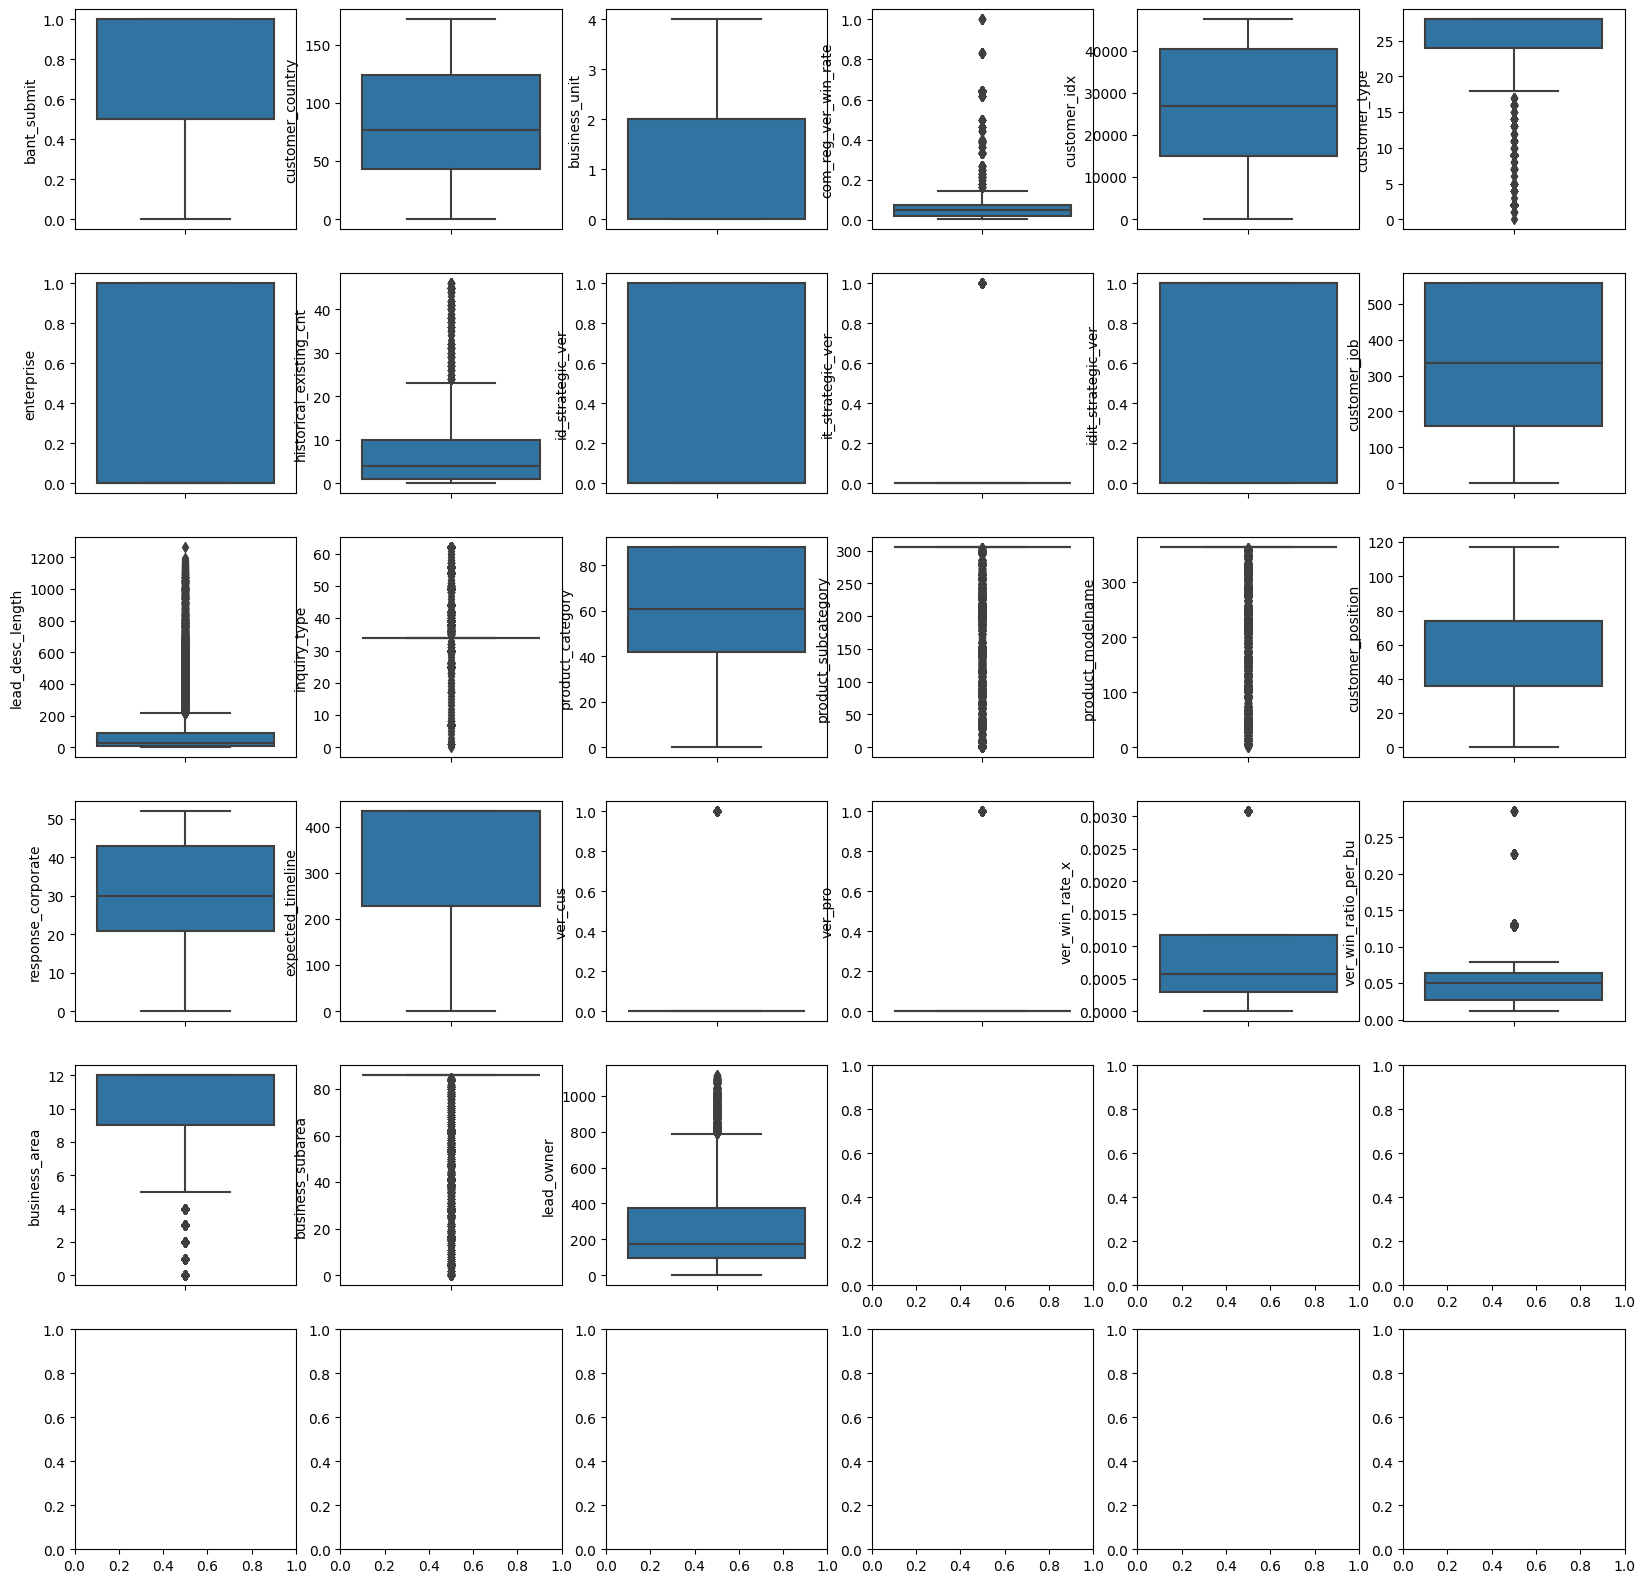

In [59]:
fig, axs = plt.subplots(6, 6, figsize = (20,20))

for i, col_name in enumerate(df_train.columns):
    row = i // 6
    col = i % 6
    sns.boxplot(data = df_train, y = col_name, ax = axs[row][col])

## KNNImputer 사용
- KNNImputer를 사용하여 결측치를 처리할 예정
- KNNImputer를 사용하려면 그 전에 Scaled가 되어있어야 된다.
- historical, customer_type, customer_job, business_sub, business

In [62]:
from sklearn.impute import KNNImputer

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
imputer = KNNImputer(n_neighbors = 3)

In [65]:
historical_index = df_train[df_train['historical_existing_cnt'].isnull()].index
test_historical_index = df_test[df_test['historical_existing_cnt'].isnull()].index

In [66]:
print(len(historical_index))
print(len(customer_type_index))
print(len(customer_job_index))
print(len(business_sub_index))
print(len(business_index))
print()
print(len(test_historical_index))
print(len(test_customer_type_index))
print(len(test_customer_job_index))
print(len(test_business_sub_index))
print(len(test_business_index))

45543
43961
18733
53773
40882

3996
1457
1439
3455
2898


In [67]:
df_train['customer_type'][customer_type_index] = np.nan
df_test['customer_type'][test_customer_type_index] = np.nan

In [68]:
df_train['customer_job'].iloc[customer_job_index] = np.nan
df_test['customer_job'].iloc[test_customer_job_index] = np.nan

In [69]:
df_train['business_subarea'][business_sub_index] = np.nan
df_test['business_subarea'][test_business_sub_index] = np.nan

In [70]:
df_train['business_area'][business_index] = np.nan
df_test['business_area'][test_business_index] = np.nan

In [71]:
scaler = StandardScaler()

In [72]:
# 'customer_idx', 'customer_position', 'expected_timeline',
cols = ['customer_job', 'customer_type', 'business_area', 'business_subarea', 'historical_existing_cnt', 'business_area']

In [73]:
scaler.fit(df_train[cols])

StandardScaler()

In [74]:
train_scaled = scaler.transform(df_train[cols])

In [75]:
train_scaled = pd.DataFrame(train_scaled, columns = cols)

In [76]:
test_scaled = scaler.transform(df_test[cols])

In [77]:
test_scaled = pd.DataFrame(df_test[cols], columns = cols)

In [ ]:
data_filled = pd.DataFrame(imputer.fit_transform(df_train[cols]), columns = cols)
test_data_filled = pd.DataFrame(imputer.transform(df_test[cols]), columns = cols)

In [ ]:
df_train['historical_existing_cnt'][historical_index] = data_filled['historical_existing_cnt'][historical_index].astype(int)
df_test['historical_existing_cnt'][test_historical_index] = test_data_filled['historical_existing_cnt'][test_historical_index].astype(int)

In [ ]:
df_train['customer_type'][customer_type_index] = data_filled['customer_type'][customer_type_index].astype(int)
df_test['customer_type'][test_customer_type_index] = test_data_filled['customer_type'][test_customer_type_index].astype(int)

In [ ]:
df_train['customer_job'][customer_job_index] = data_filled['customer_job'][customer_job_index].astype(int)
df_test['customer_job'][test_customer_job_index] = test_data_filled['customer_job'][test_customer_job_index].astype(int)

In [ ]:
df_train['business_subarea'][business_sub_index] = data_filled['business_subarea'][business_sub_index].astype(int)
df_test['business_subarea'][test_business_sub_index] = test_data_filled['business_subarea'][test_business_sub_index].astype(int)

In [ ]:
fig, axs = plt.subplots(3,2, figsize = (10,15))
sns.histplot(df_train['historical_existing_cnt'], ax = axs[0][0])
sns.histplot(df_test['historical_existing_cnt'], ax = axs[0][1])
sns.histplot(df_train['customer_type'], ax = axs[1][0])
sns.histplot(df_test['customer_type'], ax = axs[1][1])
sns.histplot(df_train['customer_job'], ax = axs[2][0])
sns.histplot(df_test['customer_job'], ax = axs[2][1])

In [ ]:
fig, axs = plt.subplots(4, 4, figsize = (15,15))
print(df_train[label_columns].isnull().sum())
for i,col_name in enumerate(label_columns):
    row = i // 4
    col = i % 4
    sns.histplot(df_train[col_name], kde = False, ax = axs[row][col])

## 결측치 회귀로 처리하기
- com_reg_ver_win_rate 진행중

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
df_train['com_reg_ver_win_rate'].isnull().sum()

44731

In [78]:
from sklearn import linear_model

In [79]:
#df_train['com_reg_ver_win_rate'] = np.log(df_train['com_reg_ver_win_rate'] + 1)

<Axes: ylabel='com_reg_ver_win_rate'>

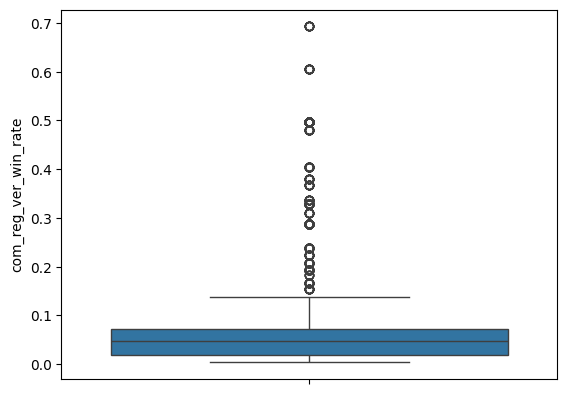

In [80]:
sns.boxplot(y=df_train['com_reg_ver_win_rate'])

In [81]:
outlier, test_outlier = Q_index('com_reg_ver_win_rate')

df_train['com_reg_ver_win_rate'][outlier] = df_train['com_reg_ver_win_rate'].median()
df_test['com_reg_ver_win_rate'][test_outlier] = df_test['com_reg_ver_win_rate'].median()

<Axes: ylabel='com_reg_ver_win_rate'>

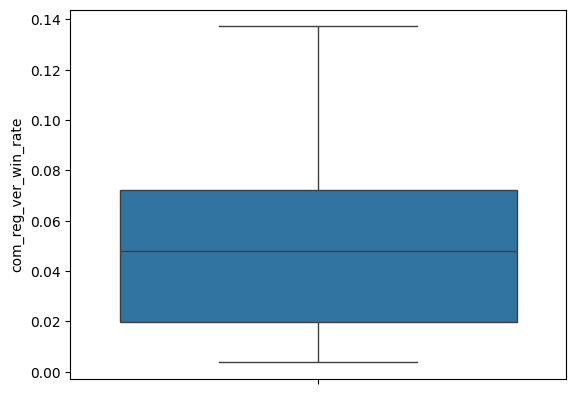

In [82]:
sns.boxplot(y = df_train['com_reg_ver_win_rate'])
#sns.boxplot(df_train['com_reg_ver_win_rate'].apply(lambda x : df_train['com_reg_ver_win_rate'].mean() if x > 0.3 else x))
#df_train['com_reg_ver_win_rate'] = df_train['com_reg_ver_win_rate'].apply(lambda x : df_train['com_reg_ver_win_rate'].mean() if x > 0.3 else x)
#df_test['com_reg_ver_win_rate'] = df_test['com_reg_ver_win_rate'].apply(lambda x : df_train['com_reg_ver_win_rate'].mean() if x > 0.3 else x)

<Axes: xlabel='com_reg_ver_win_rate', ylabel='Count'>

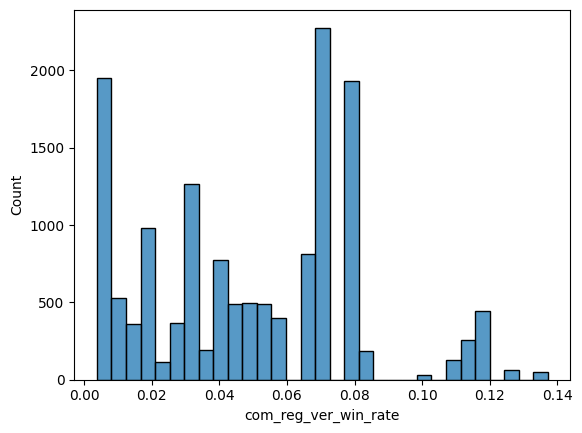

In [83]:
sns.histplot(df_train['com_reg_ver_win_rate'])

In [84]:
df_train['com_reg_ver_win_rate'].describe()

count    14568.000000
mean         0.049375
std          0.031659
min          0.003781
25%          0.019705
50%          0.048009
75%          0.072273
max          0.137201
Name: com_reg_ver_win_rate, dtype: float64

In [85]:
cols = ['business_unit', 'enterprise', 'ver_pro', 'ver_win_ratio_per_bu', 'lead_owner', 'product_subcategory',
        'product_modelname', 'it_strategic_ver', 'id_strategic_ver', 'com_reg_ver_win_rate']

In [86]:
df_train[cols].isnull().sum()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer_mice = IterativeImputer()
com_reg_ver_data = imputer_mice.fit_transform(df_train[cols])

In [87]:
com_reg_ver_data = pd.DataFrame(com_reg_ver_data, columns = cols)

In [88]:
sns.distplot(df_train['com_reg_ver_win_rate'], kde = False)

In [ ]:
sns.distplot(com_reg_ver_data['com_reg_ver_win_rate'], kde = False)

###  ver_win_rate_x
- 진행중

In [89]:
outlier, test_outlier = Q_index('ver_win_rate_x')

df_train['ver_win_rate_x'][outlier] = df_train['ver_win_rate_x'].mean()
df_test['ver_win_rate_x'][test_outlier] = df_test['ver_win_rate_x'].mean()

In [90]:
cols = ['business_unit', 'enterprise', 'ver_pro', 'ver_win_ratio_per_bu', 'lead_owner', 'product_subcategory',
        'product_modelname', 'it_strategic_ver', 'id_strategic_ver']

In [91]:
lin_reg = linear_model.LinearRegression()

X = df_train[df_train['ver_win_rate_x'] > -1][cols]
y = df_train[df_train['ver_win_rate_x'] > -1]['ver_win_rate_x']

In [92]:
lin_reg_model = lin_reg.fit(X.fillna(0),y)

In [93]:
y_pred = lin_reg_model.predict(df_train.fillna(0).loc[:,cols])
df_train['ver_win_rate_x'].fillna(pd.Series(y_pred.flatten()), inplace = True)
y_pred_1 = lin_reg_model.predict(df_test.fillna(0).loc[:,cols])
df_test['ver_win_rate_x'].fillna(pd.Series(y_pred_1.flatten()), inplace = True)

<Axes: xlabel='ver_win_rate_x', ylabel='Count'>

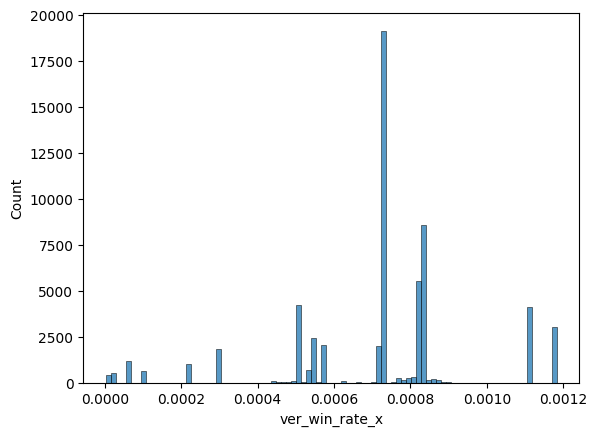

In [94]:
sns.histplot(df_train['ver_win_rate_x'])

In [95]:
outlier, test_outlier = Q_index('ver_win_ratio_per_bu')

df_train['ver_win_ratio_per_bu'][outlier] = df_train['ver_win_ratio_per_bu'].mean()
df_test['ver_win_ratio_per_bu'][test_outlier] = df_test['ver_win_ratio_per_bu'].mean()

In [96]:
cols = ['business_unit', 'com_reg_ver_win_rate', 'enterprise', 
        'id_strategic_ver', 'idit_strategic_ver', 'ver_pro', 'product_modelname']

In [97]:
lr = linear_model.LinearRegression()

X = df_train[df_train['ver_win_ratio_per_bu'] > -1][cols]
y = df_train[df_train['ver_win_ratio_per_bu'] > -1]['ver_win_ratio_per_bu']

In [98]:
lr = lr.fit(X.fillna(0),y)

In [99]:
y_pred = lr.predict(df_train.fillna(0).loc[:,cols])
df_train['ver_win_ratio_per_bu'].fillna(pd.Series(y_pred.flatten()), inplace = True)
y_pred_1 = lr.predict(df_test.fillna(0).loc[:,cols])
df_test['ver_win_ratio_per_bu'].fillna(pd.Series(y_pred_1.flatten()), inplace = True)

### 2-2. 학습, 검증 데이터 분리

## 3. 모델 학습

### 모델 정의 

In [218]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

In [219]:
# model = XGBClassifier(n_estimators = 100)

In [220]:
# params = {'max_depth' : [5,6,7,8,9,10],
#           'min_child_weight' : [1,3],
#           'colsample_bytree':[0.5,0.75],
#           'subsample' : (0.5, 0.75, 1)}

In [221]:
# gridcv = GridSearchCV(model, param_grid = params, cv = 5)

In [222]:
# gridcv.fit(x_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [(x_val, y_val)])

In [223]:
# print(gridcv.best_params_)

In [224]:
# x_train, x_val, y_train, y_val = train_test_split(
#     df_train.drop("is_converted", axis=1).fillna(0),
#     df_train["is_converted"],
#     test_size=0.2,
#     shuffle=True,
#     stratify = df_train['is_converted'],
# )

In [225]:
# x_train.info()

In [226]:
# model = XGBClassifier(n_estimators = 1000, learning_rate = 0.02, max_depth = 10, min_childe_weight = 1, colsample_bytree = 0.5, n_jobs = -1)

In [227]:
# model.fit(x_train,y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(x_val, y_val)])

[0]	validation_0-auc:0.91383
[1]	validation_0-auc:0.94705
[2]	validation_0-auc:0.95355
[3]	validation_0-auc:0.95795
[4]	validation_0-auc:0.96192
[5]	validation_0-auc:0.96405
[6]	validation_0-auc:0.96377
[7]	validation_0-auc:0.96457
[8]	validation_0-auc:0.96484
[9]	validation_0-auc:0.96540
[10]	validation_0-auc:0.96577
[11]	validation_0-auc:0.96741
[12]	validation_0-auc:0.96651
[13]	validation_0-auc:0.96760
[14]	validation_0-auc:0.96832
[15]	validation_0-auc:0.96801
[16]	validation_0-auc:0.96875
[17]	validation_0-auc:0.96922
[18]	validation_0-auc:0.96843
[19]	validation_0-auc:0.96849
[20]	validation_0-auc:0.96859
[21]	validation_0-auc:0.96944
[22]	validation_0-auc:0.96976
[23]	validation_0-auc:0.97000
[24]	validation_0-auc:0.97004
[25]	validation_0-auc:0.96988
[26]	validation_0-auc:0.96992
[27]	validation_0-auc:0.97019
[28]	validation_0-auc:0.97049
[29]	validation_0-auc:0.97065
[30]	validation_0-auc:0.97075
[31]	validation_0-auc:0.97122
[32]	validation_0-auc:0.97110
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_childe_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, num_parallel_tree=None, ...)

### 모델 학습

In [228]:
# model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_childe_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, num_parallel_tree=None, ...)

In [229]:
# pred = model.predict(x_val)
# get_clf_eval(y_val, pred)

오차행렬:
 [[  719   251]
 [   45 10845]]

정확도: 0.9750
정밀도: 0.9411
재현율: 0.7412
F1: 0.8293


In [230]:
# pred = model.predict(df_test.drop(['is_converted', 'id'], axis = 1).fillna(0))

In [251]:
# print(sum(pred))

[0]


## 딥러닝

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [113]:
train_labels = df_train['is_converted']
test_labels = df_test['is_converted']
print(train_labels.shape, test_labels.shape)

(59299,) (5271,)


In [114]:
train_stats = df_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
bant_submit,59299.0,0.634593,0.286066,0.000000,0.500000,0.500000,1.000000,1.000000
customer_country,59299.0,83.366650,47.607821,0.000000,43.000000,77.000000,124.000000,172.000000
business_unit,59299.0,1.320494,1.172829,0.000000,0.000000,2.000000,2.000000,4.000000
com_reg_ver_win_rate,59299.0,0.037293,0.024062,0.003725,0.015994,0.034134,0.055940,0.143031
customer_idx,59299.0,27114.556333,14653.911888,2.000000,14913.000000,26774.000000,40368.500000,47466.000000
customer_type,59299.0,10.997302,5.516791,0.000000,9.000000,9.000000,14.000000,27.000000
enterprise,59299.0,0.362839,0.480823,0.000000,0.000000,0.000000,1.000000,1.000000
historical_existing_cnt,59299.0,5.566027,7.296847,0.000000,0.000000,2.000000,9.000000,46.000000
id_strategic_ver,59299.0,0.431087,0.495232,0.000000,0.000000,0.000000,1.000000,1.000000
it_strategic_ver,59299.0,0.146107,0.353216,0.000000,0.000000,0.000000,0.000000,1.000000


In [115]:
def norm(x) :
    return (x - train_stats['mean']) / train_stats['std']

In [116]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1).fillna(0),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    stratify = df_train['is_converted'],
)

In [117]:
normed_train_data = norm(x_train)
normed_val_data = norm(x_val)
normed_test_data = norm(df_test.drop(['is_converted','id'],axis = 1))

In [118]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(x_train)
# from sklearn.preprocessing import MinMaxScaler
# ss = MinMaxScaler()
# ss.fit(x_train)

In [119]:
# normed_train_data = ss.transform(x_train)
# normed_val_data = ss.transform(x_val)
# normed_test_data = ss.transform(df_test.drop(['is_converted','id'],axis = 1))

In [120]:
# print(normed_train_data.shape, normed_val_data.shape, normed_test_data.shape)

In [268]:
def build_model() :
    model = keras.Sequential([
        layers.BatchNormalization(input_shape = [len(x_train.keys())]),
        layers.Dense(128, activation = 'relu'),
        layers.BatchNormalization(),
        layers.Dropout(rate = 0.3),
        layers.Dense(256, activation = 'relu' ),
        layers.BatchNormalization(),
        layers.Dropout(rate = 0.3),
        layers.Dense(128, activation = 'tanh' ),
        layers.BatchNormalization(),
        layers.Dropout(rate = 0.3),
        layers.Dense(1, activation = 'sigmoid')
    ])
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    return model

In [269]:
model = build_model()

In [270]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_28 (Bat  (None, 27)               108       
 chNormalization)                                                
                                                                 
 dense_28 (Dense)            (None, 128)               3584      
                                                                 
 batch_normalization_29 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_30 (Bat  (None, 256)             

In [271]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end = '')
        
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

EPOCHS =  800

In [272]:
history = model.fit(normed_train_data, y_train, 
                    epochs = EPOCHS, 
                    validation_split = 0.2, 
                    verbose = 0,
                    batch_size = 512,
                    callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [273]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,binary_accuracy,val_loss,val_binary_accuracy,epoch
790,0.281634,0.917973,0.282611,0.919161,790
791,0.281104,0.917973,0.282805,0.919161,791
792,0.280747,0.917973,0.282921,0.919161,792
793,0.281213,0.917973,0.282924,0.919161,793
794,0.281614,0.917973,0.282819,0.919161,794
795,0.281407,0.917973,0.282809,0.919161,795
796,0.280751,0.917973,0.282926,0.919161,796
797,0.281222,0.917973,0.282915,0.919161,797
798,0.281475,0.917973,0.282826,0.919161,798
799,0.281324,0.917973,0.282862,0.919161,799


<Axes: title={'center': 'Accuracy'}>

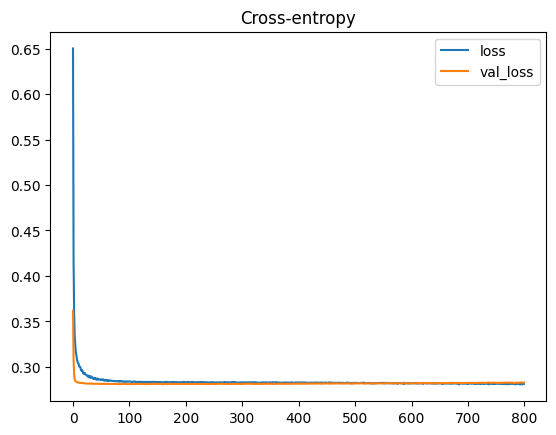

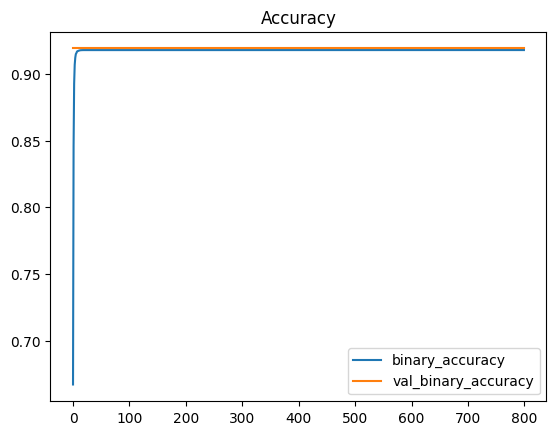

In [274]:
hist.loc[:, ['loss', 'val_loss']].plot(title = 'Cross-entropy')
hist.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title = 'Accuracy')

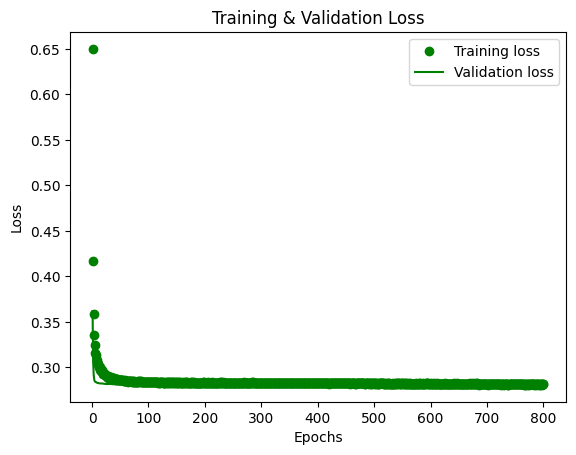

In [275]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'go', label='Training loss') #go : green dot
plt.plot(epochs, val_loss, 'g', label='Validation loss') #g : green 

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

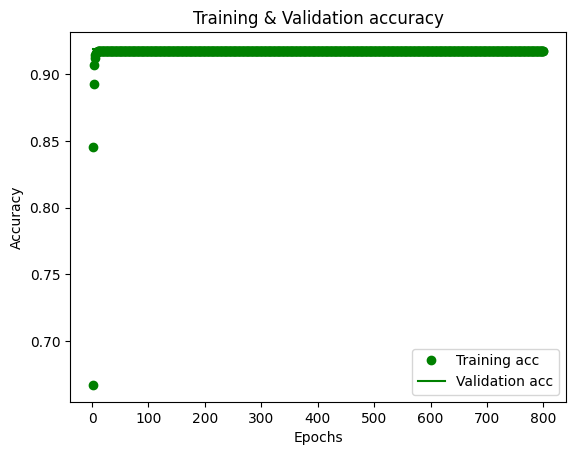

In [276]:
plt.clf() #그래프 초기화하기
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'go', label='Training acc') #go : green dot
plt.plot(epochs, val_acc, 'g', label='Validation acc') #g : green line
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [277]:
model.evaluate(normed_val_data, y_val,verbose=2)

371/371 - 0s - loss: 0.2857 - binary_accuracy: 0.9182 - 417ms/epoch - 1ms/step


[0.2857297658920288, 0.9182124733924866]

### 모델 성능 보기

In [278]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [279]:
pred = model.predict(normed_val_data)

pred = (pred > 0.5).astype(int)
get_clf_eval(y_val, pred)

371/371 [==============================] - 0s 1ms/step
오차행렬:
 [[    0   970]
 [    0 10890]]

정확도: 0.9182
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000


In [280]:
# # 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)

## 4. 제출하기

### 테스트 데이터 예측

In [281]:
test_pred = model.predict(normed_test_data)
test_pred = (test_pred > 0.5).astype(bool)
# sum(test_pred) # True로 예측된 개수
print(pd.DataFrame(test_pred).value_counts())

165/165 [==============================] - 0s 1ms/step
False    5271
Name: count, dtype: int64


In [282]:
df_test['is_converted'].value_counts()

is_converted
False    4973
True      298
Name: count, dtype: int64

In [283]:
print(sum(df_test['is_converted']))

298


### 제출 파일 작성

In [250]:
# # 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
# df_sub = pd.read_csv("submission.csv")
# df_sub["is_converted"] = test_pred

# # 제출 파일 저장
# df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**